
Call:
seas(x = pib1_ts)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
MA-Nonseasonal-01 -0.11284    0.10860  -1.039    0.299    
MA-Seasonal-04     0.78272    0.07289  10.738   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (0 1 1)(0 1 1)  Obs.: 85  Transform: log
AICc:  3961, BIC:  3968  QS (no seasonality in final):    0  
Box-Ljung (no autocorr.): 18.53   Shapiro (normality): 0.9845  

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



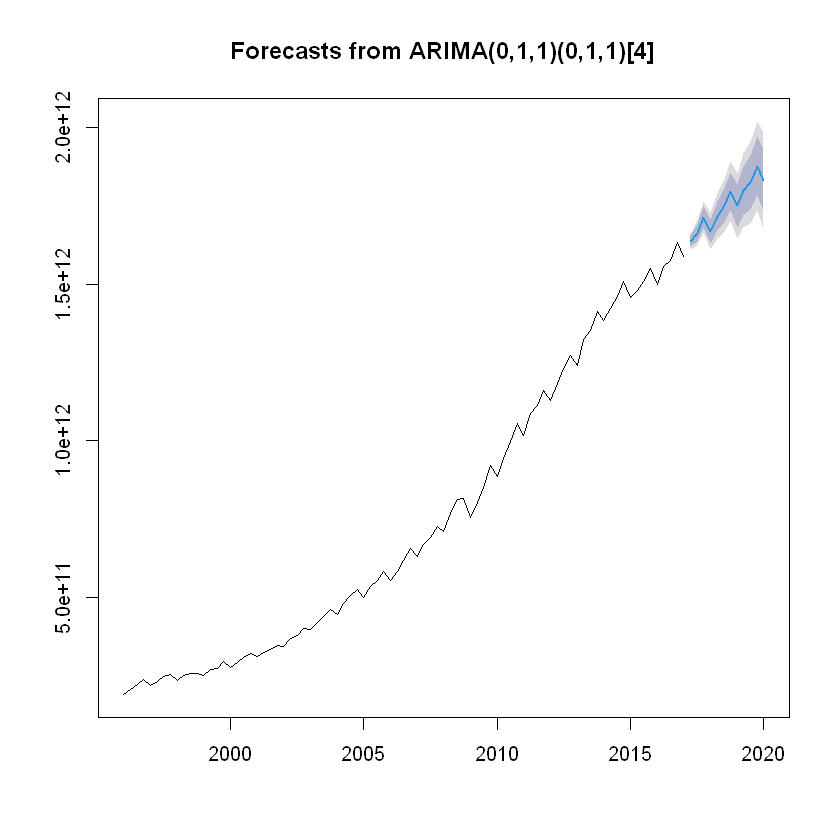


Call:
seas(x = pib3_ts)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
AO1998.4          -0.04356    0.01069  -4.075 4.60e-05 ***
MA-Nonseasonal-01 -0.10965    0.10291  -1.065    0.287    
MA-Seasonal-04     0.60850    0.07581   8.027 9.98e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (0 1 1)(0 1 1)  Obs.: 97  Transform: log
AICc:  4556, BIC:  4566  QS (no seasonality in final):    0  
Box-Ljung (no autocorr.): 18.79   Shapiro (normality): 0.988  

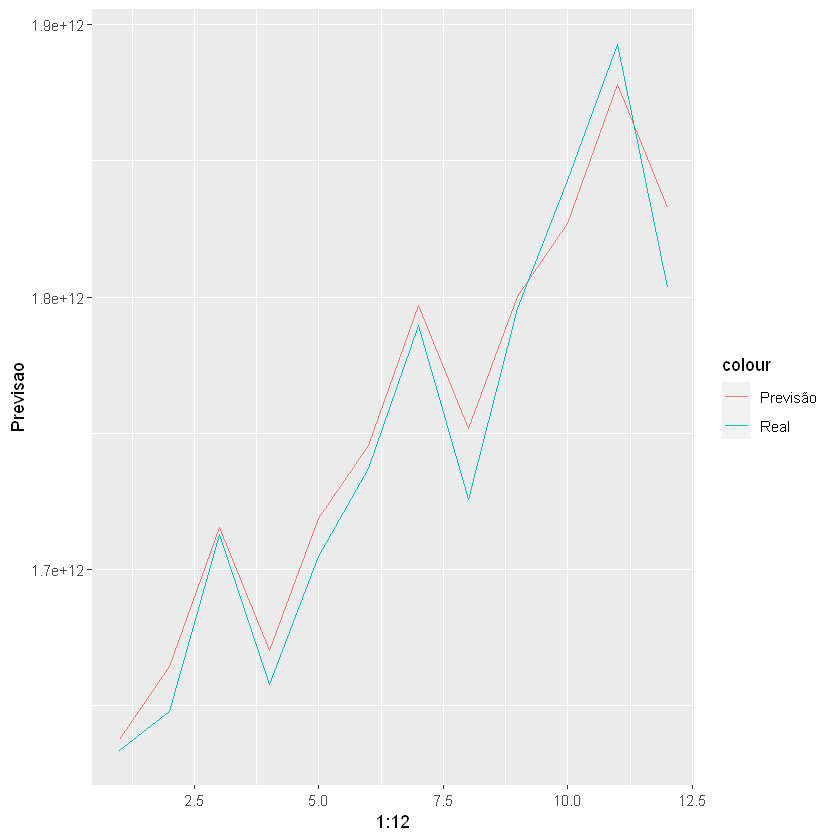

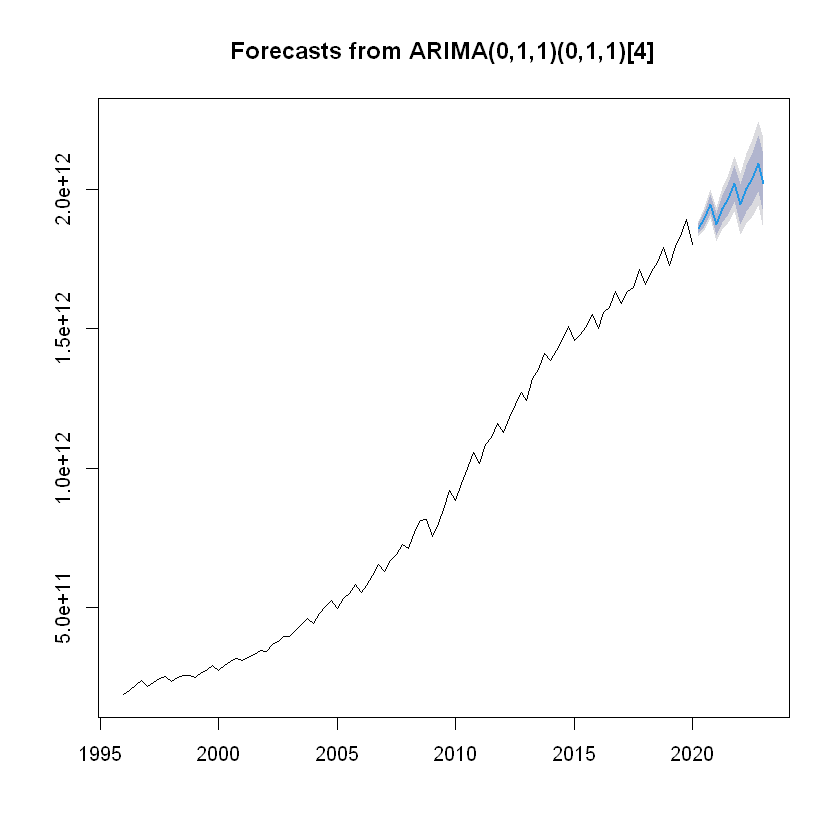

In [2]:
library(seasonal)
library(fredr)
library(forecast)
library(ggplot2)
fredr_set_key("a1e53d11bf4cb319624da39b894a79e6")
pib1 <- fredr("NAEXCP01BRQ189N", observation_start = as.Date("1996-01-01"),
              observation_end = as.Date("2017-01-01"))
pib1_ts <- ts(pib1$value, start = c(1996,01), frequency = 4)
pib1_seas <- seas(pib1_ts)
summary(pib1_seas)
pib1_arima <- arima(pib1_ts, order = c(0,1,1), seasonal = c(0,1,1))
pib1_forecast <- forecast(pib1_arima, h = 12)
plot(pib1_forecast)
pib <- fredr("NAEXCP01BRQ189N", observation_start = as.Date("2017-04-01"))
data <- data.frame(Previsao = pib1_forecast$mean, Real = pib$value)
ggplot(data, aes(x = 1:12))+
  geom_line(aes(y = Previsao, col = "Previsão"))+
  geom_line(aes(y = Real, col = "Real"))
pib3 <- fredr("NAEXCP01BRQ189N", observation_start = as.Date("1996-01-01"))
pib3_ts <- ts(pib3$value, start = c(1996,01), frequency = 4)
pib3_seas <- seas(pib3_ts)
summary(pib3_seas)
pib3_arima <- arima(pib3_ts, order = c(0,1,1), seasonal = c(0,1,1))
pib3_forecast <- forecast(pib3_arima, h = 12)
plot(pib3_forecast)